# Query EFD to get hexapod motion information

In [ ]:
!pip install -U lsst-efd-client

In [1]:
from astropy.time import Time, TimeDelta
import pandas as pd
from lsst_efd_client import EfdClient

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
efd_client = EfdClient('usdf_efd')

In [3]:
topics = await efd_client.get_topics()
topics[:15]

['lsst.sal.ATAOS.ackcmd',
 'lsst.sal.ATAOS.command_applyAxisOffset',
 'lsst.sal.ATAOS.command_applyFocusOffset',
 'lsst.sal.ATAOS.command_disable',
 'lsst.sal.ATAOS.command_disableCorrection',
 'lsst.sal.ATAOS.command_enable',
 'lsst.sal.ATAOS.command_enableCorrection',
 'lsst.sal.ATAOS.command_enterControl',
 'lsst.sal.ATAOS.command_exitControl',
 'lsst.sal.ATAOS.command_offset',
 'lsst.sal.ATAOS.command_resetOffset',
 'lsst.sal.ATAOS.command_setCorrectionModelOffsets',
 'lsst.sal.ATAOS.command_setLogLevel',
 'lsst.sal.ATAOS.command_setWavelength',
 'lsst.sal.ATAOS.command_standby']

In [41]:
topics

['lsst.sal.ATAOS.ackcmd',
 'lsst.sal.ATAOS.command_applyAxisOffset',
 'lsst.sal.ATAOS.command_applyFocusOffset',
 'lsst.sal.ATAOS.command_disable',
 'lsst.sal.ATAOS.command_disableCorrection',
 'lsst.sal.ATAOS.command_enable',
 'lsst.sal.ATAOS.command_enableCorrection',
 'lsst.sal.ATAOS.command_enterControl',
 'lsst.sal.ATAOS.command_exitControl',
 'lsst.sal.ATAOS.command_offset',
 'lsst.sal.ATAOS.command_resetOffset',
 'lsst.sal.ATAOS.command_setCorrectionModelOffsets',
 'lsst.sal.ATAOS.command_setLogLevel',
 'lsst.sal.ATAOS.command_setWavelength',
 'lsst.sal.ATAOS.command_standby',
 'lsst.sal.ATAOS.command_start',
 'lsst.sal.ATAOS.logevent_appliedSettingsMatchStart',
 'lsst.sal.ATAOS.logevent_atspectrographCorrectionCompleted',
 'lsst.sal.ATAOS.logevent_atspectrographCorrectionStarted',
 'lsst.sal.ATAOS.logevent_authList',
 'lsst.sal.ATAOS.logevent_configurationApplied',
 'lsst.sal.ATAOS.logevent_configurationsAvailable',
 'lsst.sal.ATAOS.logevent_correctionEnabled',
 'lsst.sal.ATAOS

In [4]:
# example query from https://github.com/lsst-sqre/system-test/blob/master/efd_examples/Advanced_queries.ipynb

t2 = Time('2022-06-15T12:00:00', scale='utc')
t1 = t2 - TimeDelta(5*24*3600, format='sec')

In [5]:
def make_query_str(beg, end, interval):
    return (f'''SELECT mean(ambient_temp) AS temp, mean(pressure) AS pressure, mean(humidity) AS humidity
               FROM "lsst.sal.WeatherStation.weather" 
               WHERE time > '{beg.isot}Z' AND time < '{end.isot}Z'
               GROUP BY time({interval})''')

In [6]:
def plot_result(result):
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, nrows=1)
    ax0.plot(result.index, result['temp'])
    ax0.set_xlabel('Date')
    ax0.set_ylabel('Temperature (ºC)')
    ax1.plot(result.index, result['pressure'])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Pressure (mm Hg)')
    ax2.plot(result.index, result['humidity'])
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Relative Humidity (%)')
    plt.gcf().autofmt_xdate()
    plt.subplots_adjust(wspace=0.50)

In [7]:
result = await efd_stable.influx_client.query(make_query_str(t1, t2, '30m'))

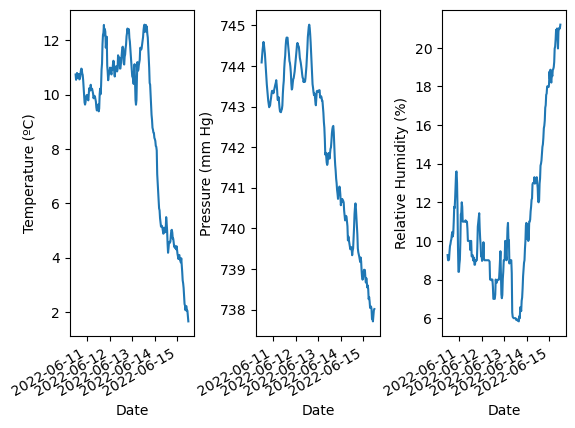

In [8]:
import numpy as np # standard package for doing calculations
import matplotlib.pyplot as plt # standard package for plotting

plot_result(result)

## retrieve hexapod data for  auxTel donut pairs...

In [4]:
intra_images = [2022040500211,2022040500217, 2022040500222,  2022040500263,  
                2022040500267,2022040500271, 2022040500449, 2022040500533, 
                2022040500602,  2022040500795]  
extra_images =  [2022040500212, 2022040500218 ,2022040500223,2022040500264,
                 2022040500268,2022040500272,2022040500450,2022040500534,
                 2022040500603,2022040500796]
                 

In [7]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
import numpy as np 
from lsst.daf import butler as dafButler

butler = dafButler.Butler('/sdf/data/rubin/repo/main/')
datasetRefs = butler.registry.queryDatasets('raw',collections='LATISS/raw/all',
                              where="instrument='LATISS' AND exposure.day_obs = 20220405").expanded()

In [24]:
all_img = np.append(intra_images, extra_images)

In [37]:
img_type = np.append(len(intra_images)*['intra'],len(extra_images)*['extra'])


In [38]:
exp = record.dataId['exposure']

In [39]:
all_img == exp

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [42]:
all_spans = []
for i, ref in enumerate(datasetRefs):
    record = ref.dataId.records["exposure"]
    exp = record.dataId['exposure']
    if exp in all_img : 
        all_spans.append(record.timespan)
        print(img_type[all_img == exp], exp, record.group_id, record.group_name)

['intra'] 2022040500211 2291315529730000 2022-04-05T23:39:12.973
['extra'] 2022040500212 2291315529730000 2022-04-05T23:39:12.973
['intra'] 2022040500217 2291331665110000 2022-04-06T00:06:06.511
['extra'] 2022040500218 2291331665110000 2022-04-06T00:06:06.511
['intra'] 2022040500222 2291331665150000 2022-04-06T00:06:06.515
['extra'] 2022040500223 2291331665150000 2022-04-06T00:06:06.515
['intra'] 2022040500263 2291380004010000 2022-04-06T01:26:40.401
['extra'] 2022040500264 2291380004010000 2022-04-06T01:26:40.401
['intra'] 2022040500267 2291387262620000 2022-04-06T01:38:46.262
['extra'] 2022040500268 2291387262620000 2022-04-06T01:38:46.262
['intra'] 2022040500271 2291391016990000 2022-04-06T01:45:01.699
['extra'] 2022040500272 2291391016990000 2022-04-06T01:45:01.699
['intra'] 2022040500449 2291496702250000 2022-04-06T04:41:10.225
['extra'] 2022040500450 2291496702250000 2022-04-06T04:41:10.225
['intra'] 2022040500533 2291528300470000 2022-04-06T05:33:50.047
['extra'] 2022040500534 2

In [22]:
record.group_name

'2022-04-06T09:59:38.838'

In [9]:
# https://docs.astropy.org/en/stable/time/index.html 
t1 = spans[0].begin.utc # need to use UTC scale 

In [10]:
t2 = spans[-1].end.utc

In [11]:
t1

<Time object: scale='utc' format='iso' value=2022-04-05 23:40:42.155869>

Note: there are different fields for that XML, most up-to-date notes are t 
https://ts-xml.lsst.io/sal_interfaces/ATCamera.html#endreadout
    
    

In [13]:

end_readout = await efd_client.select_time_series("lsst.sal.ATCamera.logevent_endReadout", 
                                          '*', t1, t2)

In [14]:
type(end_readout)

pandas.core.frame.DataFrame

In [15]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#  ["imageName" --> imageName  
#   "exposureTime" --> requestedExposureTime
#   "groupId" -->
#   "imageType" --> 
 
#  ]
    
    
end_readout[:4]

additionalKeys  \
2022-04-05 23:41:14.702000+00:00  imageType:groupId:testType:reason:program   
2022-04-05 23:41:51.864000+00:00  imageType:groupId:testType:reason:program   
2022-04-05 23:42:42.063000+00:00  imageType:groupId:testType:reason:program   
2022-04-05 23:53:40.877000+00:00                 imageType:groupId:testType   

                                                                   additionalValues  \
2022-04-05 23:41:14.702000+00:00  ENGTEST:2022-04-05T23\:39\:12.973:ENGTEST:INTR...   
2022-04-05 23:41:51.864000+00:00  ENGTEST:2022-04-05T23\:39\:12.973:ENGTEST:EXTR...   
2022-04-05 23:42:42.063000+00:00  OBJECT:2022-04-05T23\:39\:12.973:OBJECT:FINAL_...   
2022-04-05 23:53:40.877000+00:00            OBJECT:2022-04-05T23\:52\:32.608:OBJECT   

                                 imageController imageDate  imageIndex  \
2022-04-05 23:41:14.702000+00:00               O  20220405           1   
2022-04-05 23:41:51.864000+00:00               O  20220405           1   
2022-04-05 23:42:42.063000+00:00               O  20220405           1   
2022-04-05 23:53:40.877000+00:00               O  20220405           1   

                                             imageName  imageNumber  \
2022-04-05 23:41:14.702000+00:00  AT_O_20220405_000211          211   
2022-04-05 23:41:51.864000+00:00  AT_O_20220405_000212          212   
2022-04-05 23:42:42.063000+00:00  AT_O_20220405_000213          213   
2022-04-05 23:53:40.877000+00:00  AT_O_20220405_000214          214   

                                 imageSource  imagesInSequence  priority  \
2022-04-05 23:41:14.702000+00:00          AT                 1         1   
2022-04-05 23:41:51.864000+00:00          AT                 1         1   
2022-04-05 23:42:42.063000+00:00          AT                 1         1   
2022-04-05 23:53:40.877000+00:00          AT                 1         1   

                                  private_efdStamp private_identity  \
2022-04-05 23:41:14.702000+00:00      1.649202e+09         ATCamera   
2022-04-05 23:41:51.864000+00:00      1.649202e+09         ATCamera   
2022-04-05 23:42:42.063000+00:00      1.649202e+09         ATCamera   
2022-04-05 23:53:40.877000+00:00      1.649203e+09         ATCamera   

                                  private_kafkaStamp  private_origin  \
2022-04-05 23:41:14.702000+00:00        1.649202e+09        90080121   
2022-04-05 23:41:51.864000+00:00        1.649202e+09        90080121   
2022-04-05 23:42:42.063000+00:00        1.649202e+09        90080121   
2022-04-05 23:53:40.877000+00:00        1.649203e+09        90080121   

                                  private_rcvStamp private_revCode  \
2022-04-05 23:41:14.702000+00:00      1.649202e+09        e4f93dc5   
2022-04-05 23:41:51.864000+00:00      1.649202e+09        e4f93dc5   
2022-04-05 23:42:42.063000+00:00      1.649202e+09        e4f93dc5   
2022-04-05 23:53:40.877000+00:00      1.649203e+09        e4f93dc5   

                                  private_seqNum  private_sndStamp  \
2022-04-05 23:41:14.702000+00:00             222      1.649202e+09   
2022-04-05 23:41:51.864000+00:00             223      1.649202e+09   
2022-04-05 23:42:42.063000+00:00             224      1.649202e+09   
2022-04-05 23:53:40.877000+00:00             225      1.649203e+09   

                                  requestedExposureTime  \
2022-04-05 23:41:14.702000+00:00                     30   
2022-04-05 23:41:51.864000+00:00                     30   
2022-04-05 23:42:42.063000+00:00                      5   
2022-04-05 23:53:40.877000+00:00                      2   

                                  timestampAcquisitionStart  \
2022-04-05 23:41:14.702000+00:00               1.649202e+09   
2022-04-05 23:41:51.864000+00:00               1.649202e+09   
2022-04-05 23:42:42.063000+00:00               1.649202e+09   
2022-04-05 23:53:40.877000+00:00               1.649203e+09   

                                  timestampEndOfReadout  
2022-04-05 23:41:14.702000+00:00

In [57]:
end_readout['additionalKeys'][0]

'imageType:groupId:testType:reason:program'

In [44]:
end_readout['additionalValues'][0]

'ENGTEST:2022-04-05T23\\:39\\:12.973:ENGTEST:INTRA:CWFS'

In [86]:
#end_readout['imageType'] = ''
#end_readout['groupName'] = ''
imageTypes = []
groupNames = []
obsReasons = []
obsPrograms = []
for i in range(len(end_readout)):
    split = end_readout['additionalValues'][i].split(':')
    imageType = split[0]
    imageTypes.append(imageType)
    groupName = ''.join(split[1:4])
    
    if len(split) == 5:
        obsReason = ''
        obsProgram = ''
    if len(split) == 6:
        obsReason = split[5]         # intra or extra  
        obsProgram  = ''
    if len(split) == 7:
        obsReason = split[5]   
        obsProgram = split[6] # cwfs is what we want    
    print(i, groupName, len(split), imageType, obsReason, obsProgram)
    
    groupNames.append(groupName)
    obsReasons.append(obsReason)
    obsPrograms.append(obsProgram)
end_readout['imageType'] = imageTypes
end_readout['groupName'] = groupNames
end_readout['obsReason'] = obsReasons
end_readout['obsProgram'] = obsPrograms

0 2022-04-05T23\39\12.973 7 ENGTEST INTRA CWFS
1 2022-04-05T23\39\12.973 7 ENGTEST EXTRA CWFS
2 2022-04-05T23\39\12.973 7 OBJECT FINAL_INFOCUS CWFS
3 2022-04-05T23\52\32.608 5 OBJECT  
4 2022-04-05T23\52\32.608 5 OBJECT  
5 2022-04-05T23\52\32.608 5 OBJECT  
6 2022-04-06T00\06\06.511 7 ENGTEST INTRA CWFS
7 2022-04-06T00\06\06.511 7 ENGTEST EXTRA CWFS
8 2022-04-06T00\06\06.511 7 OBJECT FINAL_INFOCUS CWFS
9 2022-04-06T00\06\06.515 7 ENGTEST INTRA CWFS
10 2022-04-06T00\06\06.515 7 ENGTEST EXTRA CWFS
11 2022-04-06T00\06\06.515 7 ENGTEST INTRA CWFS
12 2022-04-06T00\06\06.515 7 ENGTEST EXTRA CWFS
13 2022-04-06T00\06\06.515 7 OBJECT FINAL_INFOCUS CWFS
14 2022-04-06T00\09\46.108 6 OBJECT LATISS_POLE 
15 2022-04-06T00\09\46.108 6 OBJECT LATISS_POLE 
16 2022-04-06T00\14\25.249 6 OBJECT LATISS_POLE 
17 2022-04-06T00\14\25.249 6 OBJECT LATISS_POLE 
18 2022-04-06T00\16\37.054 6 OBJECT LATISS_POLE 
19 2022-04-06T00\16\37.054 6 OBJECT LATISS_POLE 
20 2022-04-06T00\17\52.144 6 OBJECT LATISS_POLE 
21 2

In [72]:
len(split
   )

5

find accompanying metadata 

In [88]:
end_readout[:3]

additionalKeys  \
2022-04-05 23:41:14.702000+00:00  imageType:groupId:testType:reason:program   
2022-04-05 23:41:51.864000+00:00  imageType:groupId:testType:reason:program   
2022-04-05 23:42:42.063000+00:00  imageType:groupId:testType:reason:program   

                                                                   additionalValues  \
2022-04-05 23:41:14.702000+00:00  ENGTEST:2022-04-05T23\:39\:12.973:ENGTEST:INTR...   
2022-04-05 23:41:51.864000+00:00  ENGTEST:2022-04-05T23\:39\:12.973:ENGTEST:EXTR...   
2022-04-05 23:42:42.063000+00:00  OBJECT:2022-04-05T23\:39\:12.973:OBJECT:FINAL_...   

                                 imageController imageDate  imageIndex  \
2022-04-05 23:41:14.702000+00:00               O  20220405           1   
2022-04-05 23:41:51.864000+00:00               O  20220405           1   
2022-04-05 23:42:42.063000+00:00               O  20220405           1   

                                             imageName  imageNumber  \
2022-04-05 23:41:14.702000+00:00  AT_O_20220405_000211          211   
2022-04-05 23:41:51.864000+00:00  AT_O_20220405_000212          212   
2022-04-05 23:42:42.063000+00:00  AT_O_20220405_000213          213   

                                 imageSource  imagesInSequence  priority  \
2022-04-05 23:41:14.702000+00:00          AT                 1         1   
2022-04-05 23:41:51.864000+00:00          AT                 1         1   
2022-04-05 23:42:42.063000+00:00          AT                 1         1   

                                  private_efdStamp private_identity  \
2022-04-05 23:41:14.702000+00:00      1.649202e+09         ATCamera   
2022-04-05 23:41:51.864000+00:00      1.649202e+09         ATCamera   
2022-04-05 23:42:42.063000+00:00      1.649202e+09         ATCamera   

                                  private_kafkaStamp  private_origin  \
2022-04-05 23:41:14.702000+00:00        1.649202e+09        90080121   
2022-04-05 23:41:51.864000+00:00        1.649202e+09        90080121   
2022-04-05 23:42:42.063000+00:00        1.649202e+09        90080121   

                                  private_rcvStamp private_revCode  \
2022-04-05 23:41:14.702000+00:00      1.649202e+09        e4f93dc5   
2022-04-05 23:41:51.864000+00:00      1.649202e+09        e4f93dc5   
2022-04-05 23:42:42.063000+00:00      1.649202e+09        e4f93dc5   

                                  private_seqNum  private_sndStamp  \
2022-04-05 23:41:14.702000+00:00             222      1.649202e+09   
2022-04-05 23:41:51.864000+00:00             223      1.649202e+09   
2022-04-05 23:42:42.063000+00:00             224      1.649202e+09   

                                  requestedExposureTime  \
2022-04-05 23:41:14.702000+00:00                     30   
2022-04-05 23:41:51.864000+00:00                     30   
2022-04-05 23:42:42.063000+00:00                      5   

                                  timestampAcquisitionStart  \
2022-04-05 23:41:14.702000+00:00               1.649202e+09   
2022-04-05 23:41:51.864000+00:00               1.649202e+09   
2022-04-05 23:42:42.063000+00:00               1.649202e+09   

                                  timestampEndOfReadout imageType  \
2022-04-05 23:41:14.702000+00:00           1.649202e+09   ENGTEST   
2022-04-05 23:41:51.864000+00:00           1.649202e+09   ENGTEST   
2022-04-05 23:42:42.063000+00:00           1.649202e+09    OBJECT   

                                                groupName      obsReason  \
2022-04-05 23:41:14.702000+00:00  2022-04-05T23\39\12.973          INTRA   
2022-04-05 23:41:51.864000+00:00  2022-04-05T23\39\12.973          EXTRA   
2022-04-05 23:42:42.063000+00:00  2022-04-05T23\39\12.973  FINAL_INFOCUS   

                                 obsProgram  
2022-04-05 23:41:14.702000+00:00       CWFS  
2022-04-05 23:41:51.864000+00:00       CWFS  
2022-04-05 23:42:42.063000+00:00       CWFS

In [63]:
split = end_readout['additionalValues'][0].split(':')

In [102]:
end_readout.index[0]

Timestamp('2022-04-05 23:41:14.702000+0000', tz='UTC')

In [100]:
t = Time(end_readout.index[0])
t

<Time object: scale='utc' format='datetime' value=2022-04-05 23:41:14.702000>

In [101]:
t.utc

<Time object: scale='utc' format='datetime' value=2022-04-05 23:41:14.702000>

In [87]:
end_readout['groupName'][i] 


'2022-04-06T08\\23\\56.244'

In [91]:
intra_images = []
extra_images = []
intra_times = []
extra_times = []
intra_exptimes = []
extra_exptimes = []

i = 0
npairs = 0
nmiss = 0

while i < len(end_readout)-2:
    intra = end_readout['imageName'][i]
    extra = end_readout['imageName'][i+1]
    
    if ((end_readout['imageType'][i] == 'ENGTEST') and
       (end_readout['obsReason'][i] == 'INTRA') and
        (end_readout['obsReason'][i+1] == 'EXTRA')
       ):
    
#     ((end_readout['groupName'][i] == end_readout['groupName'][i+1]) and 
#         (end_readout['groupName'][i+1] != end_readout['groupName'][i+2]) and
#         (end_readout['imageType'][i] == 'ENGTEST')):
        
        intraReason = end_readout['obsReason'][i]
        extraReason = end_readout['obsReason'][i+1]
        print(f"Got a pair: {intra} x {extra}, {intraReason}, {extraReason}")
        intra_images.append(intra)
        extra_images.append(extra)
        intra_times.append(end_readout.index[i])
        extra_times.append(end_readout.index[i+1])
        intra_exptimes.append(end_readout['requestedExposureTime'][i])
        extra_exptimes.append(end_readout['requestedExposureTime'][i+1])
        i+=2
        npairs+=1
    else:
        #print(f"No Match: {intra} x {extra}")
        nmiss+=1
        i+=1

print(f"Got {npairs} pairs and {nmiss} misses.")

Got a pair: AT_O_20220405_000211 x AT_O_20220405_000212, INTRA, EXTRA
Got a pair: AT_O_20220405_000217 x AT_O_20220405_000218, INTRA, EXTRA
Got a pair: AT_O_20220405_000220 x AT_O_20220405_000221, INTRA, EXTRA
Got a pair: AT_O_20220405_000222 x AT_O_20220405_000223, INTRA, EXTRA
Got a pair: AT_O_20220405_000263 x AT_O_20220405_000264, INTRA, EXTRA
Got a pair: AT_O_20220405_000267 x AT_O_20220405_000268, INTRA, EXTRA
Got a pair: AT_O_20220405_000269 x AT_O_20220405_000270, INTRA, EXTRA
Got a pair: AT_O_20220405_000271 x AT_O_20220405_000272, INTRA, EXTRA
Got a pair: AT_O_20220405_000449 x AT_O_20220405_000450, INTRA, EXTRA
Got a pair: AT_O_20220405_000533 x AT_O_20220405_000534, INTRA, EXTRA
Got a pair: AT_O_20220405_000602 x AT_O_20220405_000603, INTRA, EXTRA
Got 11 pairs and 560 misses.


In [34]:
npairs = len(intra_images)

In [92]:
# Create numpy data structure to hold items of interest
match_data = np.zeros(npairs, dtype=[('intra', '<U35'), 
                                     ('extra', '<U35'), 
                                     ('az', float), 
                                           ('el', float), 
                                           ('rot_pos', float),
                                           ('x', float), 
                                           ('y', float), 
                                           ('z', float), 
                                           ('u', float), 
                                           ('v', float), 
                                           ('w', float), 
                                     ('m1_pressure', float),
                                     ('dz', float)])

In [96]:
i =0

Time(intra_times[i].utc

AttributeError: 'Timestamp' object has no attribute 'utc'

In [103]:
# Populate the data structure from the pairs found above
for i in range(npairs):
    
    # Determine time stamps for searching for metadata
    # include ability to correct for TAI if required, but set to zero for the moment

    t1 = Time(intra_times[i]) - TimeDelta(intra_exptimes[i], format='sec') 
    #- TimeDelta(180., format='sec', scale='tai')
    t2 = Time(extra_times[i]) - TimeDelta(2., format='sec')

    azel = await efd_client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", 
                                               ["elevationCalculatedAngle99", "azimuthCalculatedAngle99"], t1, t2)
    
    rotator = await efd_client.select_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders",
                                                  ["nasmyth2CalculatedAngle99"], t1, t2)

    hexapod_vals = await efd_client.select_time_series("lsst.sal.ATHexapod.positionStatus", 
                                           ["reportedPosition0", "reportedPosition1", "reportedPosition2",
                                           "reportedPosition3", "reportedPosition4", "reportedPosition5"], t1 , t2)

    m1_pressure = await efd_client.select_time_series("lsst.sal.ATPneumatics.m1AirPressure",
                                                  ["pressure"], t1, t2)
    
    offset = await efd_client.select_time_series("lsst.sal.ATAOS.logevent_hexapodCorrectionCompleted",
                                                 ["hexapod_x", "hexapod_y", "hexapod_z", "hexapod_u", "hexapod_v", "hexapod_w"], t1, t2)
    
    rot_pos = np.mean(rotator['nasmyth2CalculatedAngle99'])
    el = np.mean(azel['elevationCalculatedAngle99'])
    az = np.mean(azel['azimuthCalculatedAngle99'])
    
    # Take median hexapod position over the time interval
    x = hexapod_vals['reportedPosition0'].median()
    y = hexapod_vals['reportedPosition1'].median()
    z = hexapod_vals['reportedPosition2'].median()
    u = hexapod_vals['reportedPosition3'].median()
    v = hexapod_vals['reportedPosition4'].median()
    w = hexapod_vals['reportedPosition5'].median()

    m1 = np.mean(m1_pressure['pressure'])
    dz = np.nan #round((offset['hexapod_z'][-1] - offset['hexapod_z'][-2])/2.,3)
    print(t1,t2,az, el, rot_pos, x, y, z, u, u, w,dz)
    match_data[i] = (f"{intra_images[i]}.fits", 
                     f"{extra_images[i]}.fits", az, el, rot_pos, x, y, z, u, u, w, m1, dz)

2022-04-05 23:40:44.702000 2022-04-05 23:41:49.864000 -178.49154296189192 60.05669871960193 -0.975652563503424 -3.75836086902 2.19835803089 -1.5197565267 0.35 0.35 5.7541827066e-07 nan
2022-04-06 00:07:06.367000 2022-04-06 00:08:11.985000 -171.00892548091602 60.74894117066596 -0.8177146320253307 -3.6599890099500003 2.22932665439 -1.473268570445 0.35 0.35 0.0 nan
2022-04-06 00:09:52.991000 2022-04-06 00:10:59.058000 -179.98228848214896 30.4057713501009 41.337298851907136 -3.7860126676499997 2.12597940335 -1.2613152056899999 0.349998533952 0.349998533952 -1.53158091185e-07 nan
2022-04-06 00:11:48.488000 2022-04-06 00:12:53.559000 -179.98374693569696 30.402733324385974 40.85238049393229 -3.95439877239 2.26675612123 -1.38478145829 0.35 0.35 -4.35690882094e-08 nan
2022-04-06 01:26:22.758000 2022-04-06 01:27:28.012000 180.04979394141617 30.37456476260272 39.15571755926596 -3.94473082498 2.24899908078 -1.83246231574 0.350000678822 0.350000678822 -6.43229233224e-07 nan
2022-04-06 01:39:02.1470

In [104]:
# Convert to dataframe
df = pd.DataFrame(match_data)

In [105]:
#  Save to a csv file for easy access/tracking
filename="20220406_match_sens_matrix_metadata.csv"
df.to_csv(filename)

### [Aside] Try using `latiss_cwfs_align`
just use a different obscuration value and `onAxis` model (`latiss_wep_align` wouldn't work that well)... 
                           
Can't do -  so many dependencies that I can't get it to work 

( installed https://github.com/lsst-ts/ts_utils   https://github.com/lsst-ts/ts_salobj https://github.com/lsst-ts/ts_ddsconfig  https://github.com/lsst-ts/ts_idl https://github.com/lsst-ts/ts_observatory_control   https://github.com/lsst-ts/ts_standardscripts   and still in quacks for dds and other things ....) 



## Run ISR, fit with WEP, collect all Zk results 
Alternatively we can manually run the content of the other notebook (AOS_DM-37629_auxTel_batoid_pipeline.ipynb)

In [3]:
import pandas as pd
filename="20220406_match_sens_matrix_metadata.csv"
df = pd.read_csv(filename)

In [32]:
df[:4]

Unnamed: 0                      intra                      extra  \
0           0  AT_O_20220405_000211.fits  AT_O_20220405_000212.fits   
1           1  AT_O_20220405_000217.fits  AT_O_20220405_000218.fits   
2           2  AT_O_20220405_000220.fits  AT_O_20220405_000221.fits   
3           3  AT_O_20220405_000222.fits  AT_O_20220405_000223.fits   

           az         el    rot_pos         x         y         z         u  \
0 -178.491543  60.056699  -0.975653 -3.758361  2.198358 -1.519757  0.350000   
1 -171.008925  60.748941  -0.817715 -3.659989  2.229327 -1.473269  0.350000   
2 -179.982288  30.405771  41.337299 -3.786013  2.125979 -1.261315  0.349999   
3 -179.983747  30.402733  40.852380 -3.954399  2.266756 -1.384781  0.350000   

          v             w    m1_pressure  dz  
0  0.350000  5.754183e-07  100960.266680 NaN  
1  0.350000  0.000000e+00  101088.798603 NaN  
2  0.349999 -1.531581e-07   50249.871195 NaN  
3  0.350000 -4.356909e-08   49915.502503 NaN

In [4]:
def get_visitID_from_filename(filename):
    # Expects AT_O_20200218_000167.fits
    # parse out visitID from filename - this is highly annoying
    tmp=filename.split('_')
    prefix=tmp[2] # dayobs without the dashes

    # Don't remember why I used int here... whitespace? 
    # surely fixable but bigger fish.
    suffix='{:05d}'.format(int(tmp[3].split('.')[0])) # SEQNUM, but need to trim extra 0 in obsid
    visitID = int((prefix+suffix))
    #print(visitID)
    return visitID

Run ISR for all these exposures

In [2]:
from lsst.ts.wep.Utility import  runProgram

First clean up just in case... 

In [10]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
import numpy as np 
from lsst.daf import butler as dafButler
output_coll = 'u/scichris/Latiss/DM-37629'
repoDir = '/sdf/data/rubin/repo/main/'
butler = dafButler.Butler(repoDir)
registry = butler.registry
#Check that run doesn't already exist due to previous improper cleanup
collectionsList = list(registry.queryCollections())
if output_coll in collectionsList:
    cleanUpCmd = "butler remove-runs "
    cleanUpCmd += f"{repoDir} {output_coll} "
    runProgram(cleanUpCmd)

Collect all expids:

In [11]:
intra_expids = []
extra_expids = []
for i in range(len(df)):
    expIdIntra = get_visitID_from_filename(df['intra'][i])
    expIdExtra = get_visitID_from_filename(df['extra'][i])
    intra_expids.append(expIdIntra)
    extra_expids.append(expIdExtra)

In [14]:
expids = np.append(intra_expids,extra_expids)

In [15]:
# Run pipeline command

instrument = "lsst.obs.lsst.Latiss"
input_coll = "LATISS/raw/all,LATISS/calib"
output_coll = 'u/scichris/Latiss/DM-37676'
repoDir = '/sdf/data/rubin/repo/main/'
             
pipelineYaml = os.path.join(os.getcwd(),'DM-37629', "testLatissPipelineISRonly.yaml ")

pipetaskCmd = "pipetask run "
pipetaskCmd += f"-b {repoDir} "  # Specify repo
pipetaskCmd += f"-i {input_coll} "  # Specify collections with data to use
pipetaskCmd += f" --output {output_coll} " # specify output collection 
pipetaskCmd += f" --instrument {instrument} "
pipetaskCmd += f" --register-dataset-types "
pipetaskCmd += f" -p {pipelineYaml}" # specify yaml config file 

pipetaskCmd += f" -d 'exposure IN {tuple(expids)}'"

# Run pipeline task
#
runProgram(pipetaskCmd)

lsst.ctrl.mpexec.cmdLineFwk INFO: QuantumGraph contains 22 quanta for 1 tasks, graph ID: '1674793487.2127452-859567'
Quanta Tasks
------ -----
    22   isr
lsst.obs.lsst.assembly WARNING: /sdf/group/rubin/lsstdata/offline/instrument/LATISS/storage/2022-04-05/AT_O_20220405_000603-R00S00.fits: DATASEC doesn't match for ((minimum=(3, 0), maximum=(511, 1999)) != (minimum=(0, 0), maximum=(508, 1999)))
py.warnings WARNING: /sdf/group/rubin/sw/conda/envs/lsst-scipipe-5.1.0/share/eups/Linux64/obs_base/g1db3d260e8+b693413475/python/lsst/obs/base/formatters/fitsExposure.py:643: UserWarning: Reading file:///sdf/data/rubin/repo/main/u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z/flat/g/SDSSg~empty/flat_LATISS_g_SDSSg~empty_RXX_S00_u_czw_DM-32209_flatGen_20211013a-g_20211013T185808Z.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="g", physical="SDSSg~empty")).  This is probably a bug in

lsst.isr INFO: Converting exposure to floating point values.
lsst.isr INFO: Assembling CCD from amplifiers.
lsst.isr INFO: Applying bias correction.
lsst.isr INFO: Widening saturation trails.
lsst.isr INFO: Applying dark correction.
lsst.isr WARNING: darkExposure.getInfo().getVisitInfo() does not exist. Using darkScale = 1.0.
lsst.isr INFO: Applying flat correction.
lsst.isr INFO: Applying fringe correction after flat.
lsst.isr.fringe INFO: Filter not found in FringeTaskConfig.filters. Skipping fringe correction.
lsst.isr INFO: Interpolating masked pixels.
lsst.isr WARNING: No rough magnitude zero point defined for filter empty~empty.
lsst.isr INFO: Setting rough magnitude zero point for filter empty~empty: 31.692803
lsst.ctrl.mpexec.singleQuantumExecutor INFO: Execution of task 'isr' on quantum {instrument: 'LATISS', detector: 0, exposure: 2022040500269, ...} took 8.886 seconds
lsst.ctrl.mpexec.mpGraphExecutor INFO: Executed 5 quanta successfully, 0 failed and 17 remain out of total 2

lsst.isr WARNING: No rough magnitude zero point defined for filter SDSSi~empty.
lsst.isr INFO: Setting rough magnitude zero point for filter SDSSi~empty: 31.252575
lsst.ctrl.mpexec.singleQuantumExecutor INFO: Execution of task 'isr' on quantum {instrument: 'LATISS', detector: 0, exposure: 2022040500449, ...} took 9.590 seconds
lsst.ctrl.mpexec.mpGraphExecutor INFO: Executed 9 quanta successfully, 0 failed and 13 remain out of total 22 quanta.
lsst.obs.lsst.assembly WARNING: /sdf/group/rubin/lsstdata/offline/instrument/LATISS/storage/2022-04-05/AT_O_20220405_000223-R00S00.fits: DATASEC doesn't match for ((minimum=(3, 0), maximum=(511, 1999)) != (minimum=(0, 0), maximum=(508, 1999)))
py.warnings WARNING: /sdf/group/rubin/sw/conda/envs/lsst-scipipe-5.1.0/share/eups/Linux64/obs_base/g1db3d260e8+b693413475/python/lsst/obs/base/formatters/fitsExposure.py:643: UserWarning: Reading file:///sdf/data/rubin/repo/main/u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z/flat/g/SDSSg~empty/flat_LATI

py.warnings WARNING: /sdf/group/rubin/sw/conda/envs/lsst-scipipe-5.1.0/share/eups/Linux64/obs_base/g1db3d260e8+b693413475/python/lsst/obs/base/formatters/fitsExposure.py:643: UserWarning: Reading file:///sdf/data/rubin/repo/main/u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z/flat/g/SDSSg~empty/flat_LATISS_g_SDSSg~empty_RXX_S00_u_czw_DM-32209_flatGen_20211013a-g_20211013T185808Z.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="g", physical="SDSSg~empty")).  This is probably a bug in the code that produced it.
  warnings.warn(

lsst.isr INFO: Converting exposure to floating point values.
lsst.isr INFO: Assembling CCD from amplifiers.
lsst.isr INFO: Applying bias correction.
lsst.isr INFO: Widening saturation trails.
lsst.isr INFO: Applying dark correction.
lsst.isr WARNING: darkExposure.getInfo().getVisitInfo() does not exist. Using darkScale = 1.0.
lsst.isr INFO: Applying fl

lsst.isr INFO: Converting exposure to floating point values.
lsst.isr INFO: Assembling CCD from amplifiers.
lsst.isr INFO: Applying bias correction.
lsst.isr INFO: Widening saturation trails.
lsst.isr INFO: Applying dark correction.
lsst.isr WARNING: darkExposure.getInfo().getVisitInfo() does not exist. Using darkScale = 1.0.
lsst.isr INFO: Applying flat correction.
lsst.isr INFO: Applying fringe correction after flat.
lsst.isr.fringe INFO: Filter not found in FringeTaskConfig.filters. Skipping fringe correction.
lsst.isr INFO: Interpolating masked pixels.
lsst.isr WARNING: No rough magnitude zero point defined for filter SDSSg~empty.
lsst.isr INFO: Setting rough magnitude zero point for filter SDSSg~empty: 31.692803
lsst.ctrl.mpexec.singleQuantumExecutor INFO: Execution of task 'isr' on quantum {instrument: 'LATISS', detector: 0, exposure: 2022040500218, ...} took 9.306 seconds
lsst.ctrl.mpexec.mpGraphExecutor INFO: Executed 18 quanta successfully, 0 failed and 4 remain out of total 2

lsst.isr WARNING: No rough magnitude zero point defined for filter empty~empty.
lsst.isr INFO: Setting rough magnitude zero point for filter empty~empty: 31.692803
lsst.ctrl.mpexec.singleQuantumExecutor INFO: Execution of task 'isr' on quantum {instrument: 'LATISS', detector: 0, exposure: 2022040500271, ...} took 9.086 seconds
lsst.ctrl.mpexec.mpGraphExecutor INFO: Executed 22 quanta successfully, 0 failed and 0 remain out of total 22 quanta.


For each exposure pair: read postISR image, cutout donuts, run WEP

In [144]:
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask


def read_intra_extra(butler, expIdIntra, expIdExtra, 
                     collection,
                     datasetRefOrType = 'postISRCCD'):
    exposure_intra =  butler.get(datasetRefOrType, 
                                 dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':expIdIntra}, 
                                 collections=[collection])
    exposure_extra = butler.get(datasetRefOrType, 
                                dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':expIdExtra}, 
                                collections=[collection])
    return exposure_intra, exposure_extra

def make_stamps(qm, exposure_intra, exposure_extra, side=120):
    
    # this is to avoid bright stars towards edges of exposures 
    # eg. 220-221,  222-223,
    # and bleeding edge in  263-264
    ycen=1900  
    xcen=2000
    w=1500


    result_intra = qm.run(intra_exposure[ycen-w:ycen+w, xcen-w:xcen+w], donutDiameter=2 * side)
    result_extra = qm.run(extra_exposure[ycen-w:ycen+w, xcen-w:xcen+w], donutDiameter=2 * side)
    
    #x,y = result.brightestObjCentroidCofM
    
    dy = (
        result_extra.brightestObjCentroidCofM[0]
        - result_intra.brightestObjCentroidCofM[0]
    )
    dx = (
        result_extra.brightestObjCentroidCofM[1]
        - result_intra.brightestObjCentroidCofM[1]
    )
    dr = np.sqrt(dy**2 + dx**2)

    position_out_of_range = dr > 100

    
    x,y = result_intra.brightestObjCentroidCofM
    x = int(x); y = int(y)
    stamp_intra = exposure_intra.image.array[y-side:y+side, x-side:x+side]
    
    if not position_out_of_range:
        # only use if the extra-focal position is not widely different
        x,y = result_extra.brightestObjCentroidCofM
        x = int(x); y = int(y)
    stamp_extra = exposure_extra.image.array[y-side:y+side, x-side:x+side]
    
    return stamp_intra, stamp_extra# , result

0 2022040500211 2022040500212


INFO:lsst.quickFrameMeasurementTask:Found 42 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 42 of 42 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 21 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 21 of 21 sources in exposure


saved DM-37676/auxTel_2022040500211_stamps_wep_zk
1 2022040500217 2022040500218


INFO:lsst.quickFrameMeasurementTask:Found 23 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 23 of 23 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 28 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 28 of 28 sources in exposure


saved DM-37676/auxTel_2022040500217_stamps_wep_zk
2 2022040500220 2022040500221


INFO:lsst.quickFrameMeasurementTask:Found 23 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 23 of 23 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 30 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 30 of 30 sources in exposure


saved DM-37676/auxTel_2022040500220_stamps_wep_zk
3 2022040500222 2022040500223


INFO:lsst.quickFrameMeasurementTask:Found 24 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 24 of 24 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 34 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 34 of 34 sources in exposure


saved DM-37676/auxTel_2022040500222_stamps_wep_zk
4 2022040500263 2022040500264


INFO:lsst.quickFrameMeasurementTask:Found 30 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 30 of 30 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 31 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 31 of 31 sources in exposure


RuntimeError: Only square image stamps are accepted.

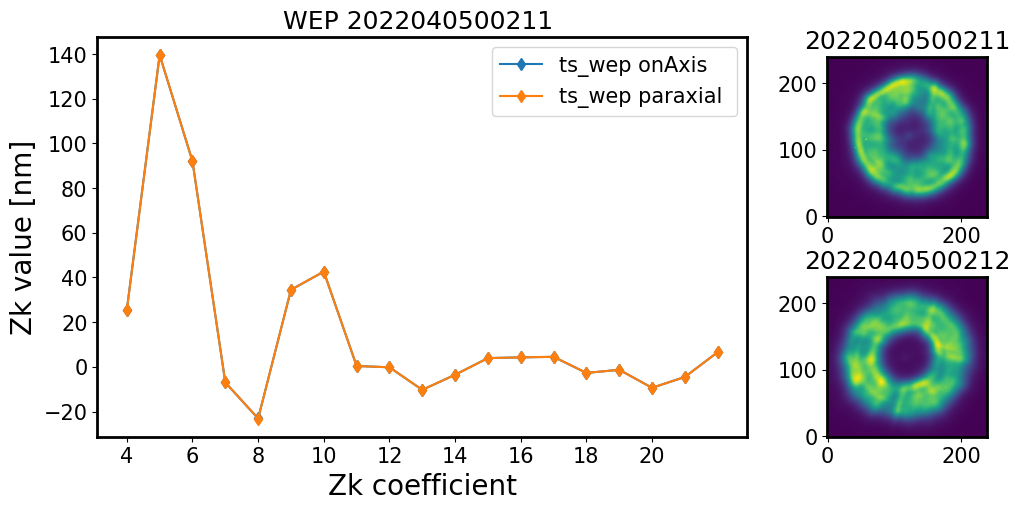

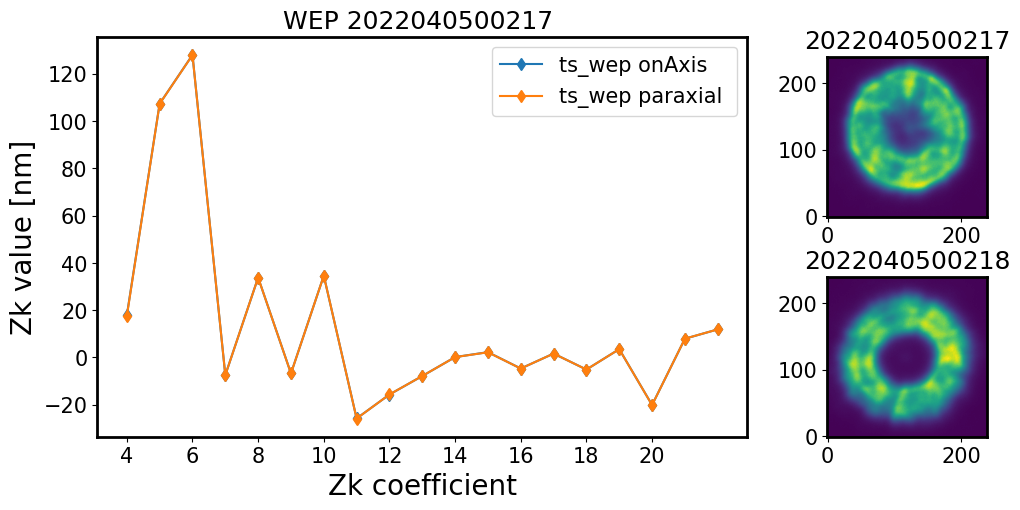

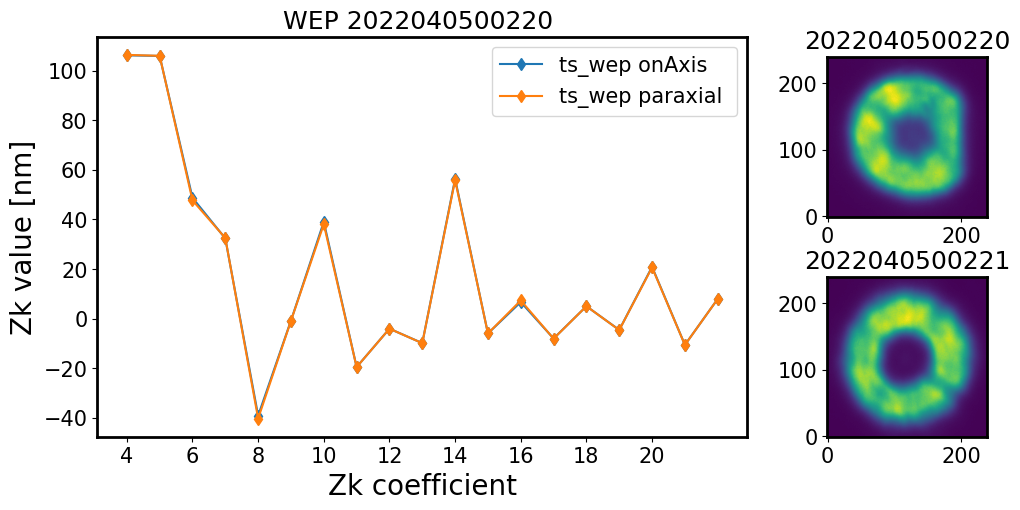

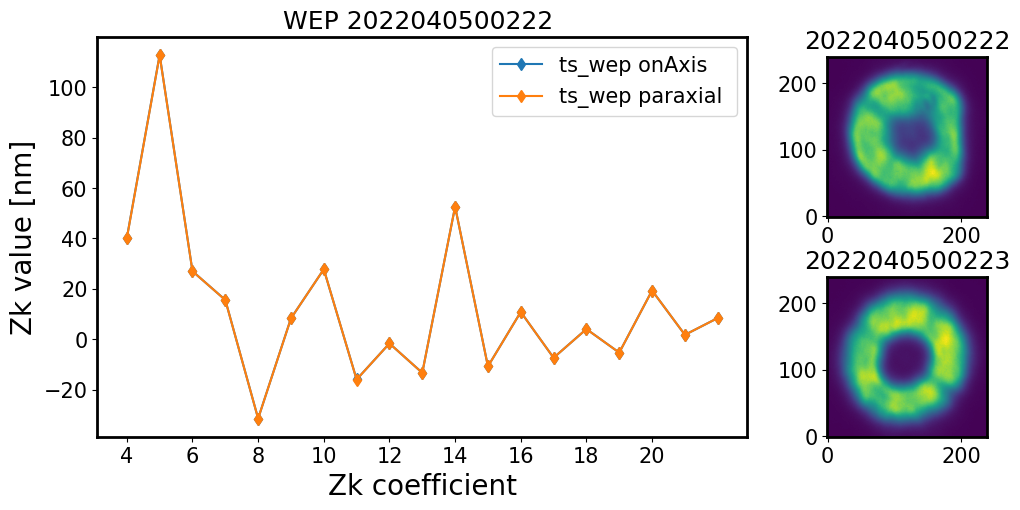

0 2022040500211 2022040500212


INFO:lsst.quickFrameMeasurementTask:Found 31 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 31 of 31 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 15 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 15 of 15 sources in exposure


saved DM-37676/auxTel_2022040500211_stamps_wep_zk
1 2022040500217 2022040500218


INFO:lsst.quickFrameMeasurementTask:Found 8 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 8 of 8 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 14 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 14 of 14 sources in exposure


saved DM-37676/auxTel_2022040500217_stamps_wep_zk
2 2022040500220 2022040500221


INFO:lsst.quickFrameMeasurementTask:Found 11 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 11 of 11 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 9 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 9 of 9 sources in exposure


saved DM-37676/auxTel_2022040500220_stamps_wep_zk
3 2022040500222 2022040500223


INFO:lsst.quickFrameMeasurementTask:Found 12 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 12 of 12 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 10 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 10 of 10 sources in exposure


saved DM-37676/auxTel_2022040500222_stamps_wep_zk
4 2022040500263 2022040500264


INFO:lsst.quickFrameMeasurementTask:Found 14 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 14 of 14 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 11 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 11 of 11 sources in exposure


saved DM-37676/auxTel_2022040500263_stamps_wep_zk
5 2022040500267 2022040500268


INFO:lsst.quickFrameMeasurementTask:Found 17 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 17 of 17 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 12 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 12 of 12 sources in exposure


saved DM-37676/auxTel_2022040500267_stamps_wep_zk
6 2022040500269 2022040500270


INFO:lsst.quickFrameMeasurementTask:Found 21 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 21 of 21 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 9 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 9 of 9 sources in exposure


saved DM-37676/auxTel_2022040500269_stamps_wep_zk
7 2022040500271 2022040500272


INFO:lsst.quickFrameMeasurementTask:Found 8 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 8 of 8 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 20 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 20 of 20 sources in exposure


saved DM-37676/auxTel_2022040500271_stamps_wep_zk
8 2022040500449 2022040500450


INFO:lsst.quickFrameMeasurementTask:Found 13 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 13 of 13 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 15 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 15 of 15 sources in exposure


saved DM-37676/auxTel_2022040500449_stamps_wep_zk
9 2022040500533 2022040500534


INFO:lsst.quickFrameMeasurementTask:Found 18 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 18 of 18 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 14 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 14 of 14 sources in exposure


saved DM-37676/auxTel_2022040500533_stamps_wep_zk
10 2022040500602 2022040500603


INFO:lsst.quickFrameMeasurementTask:Found 11 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 11 of 11 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Found 11 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 11 of 11 sources in exposure


saved DM-37676/auxTel_2022040500602_stamps_wep_zk


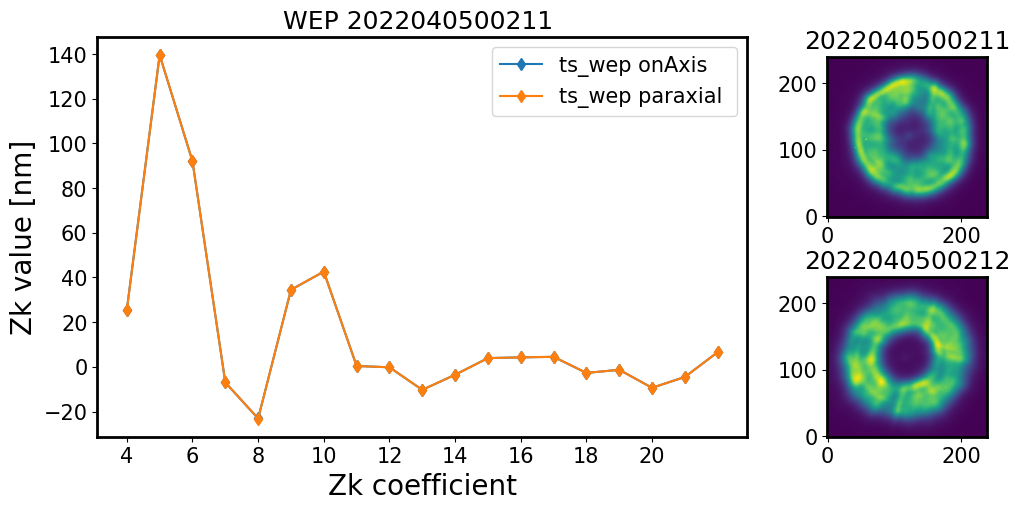

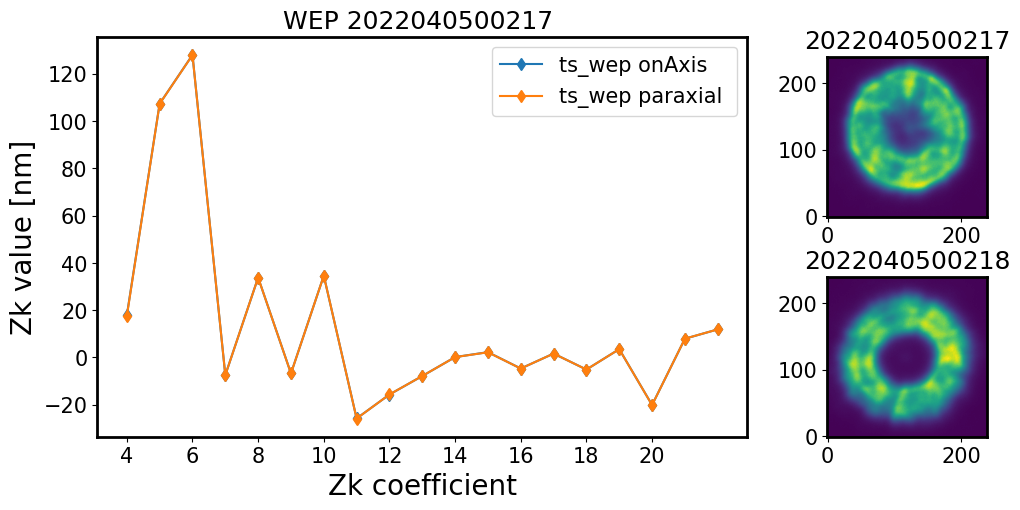

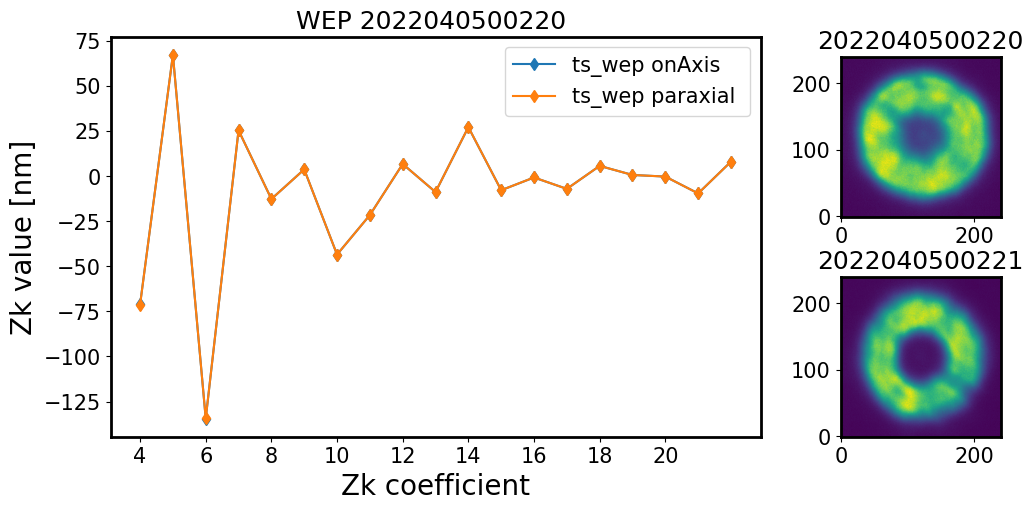

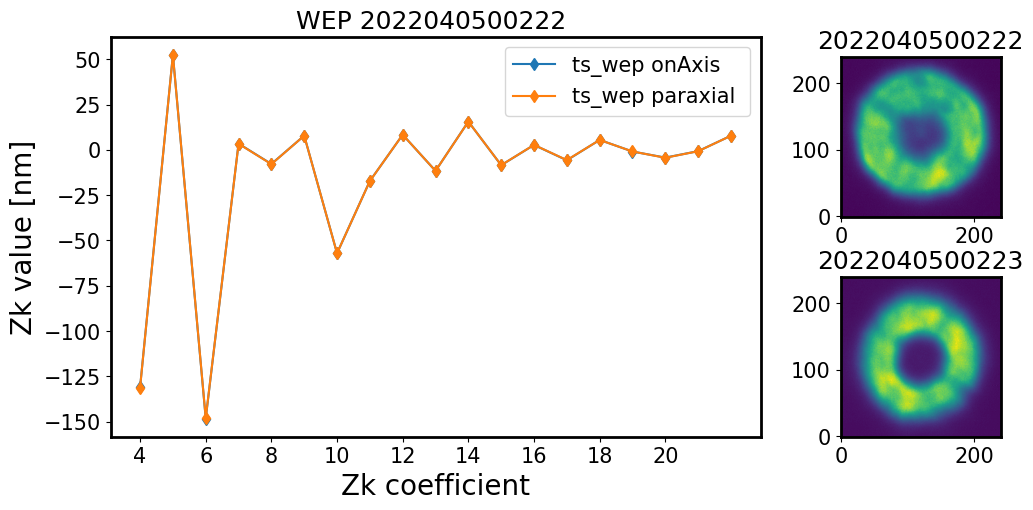

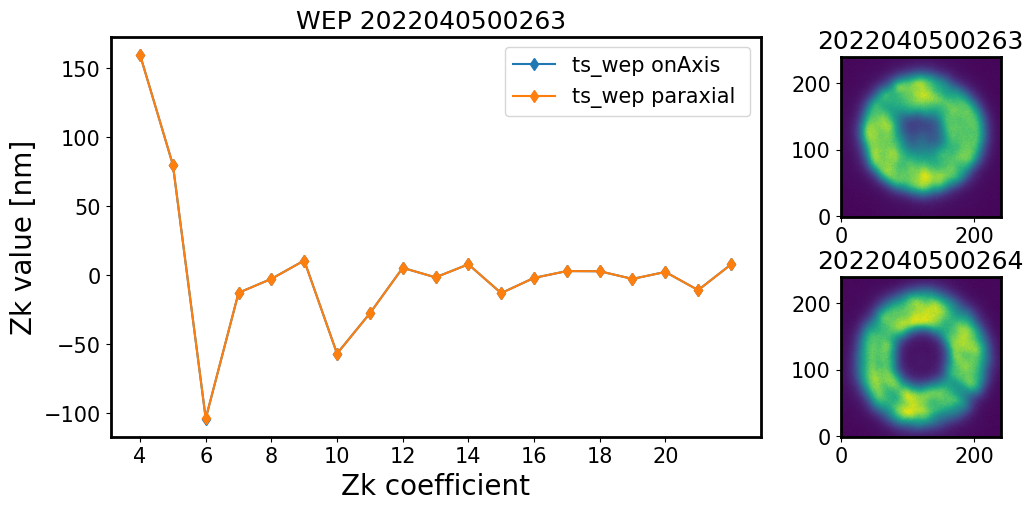

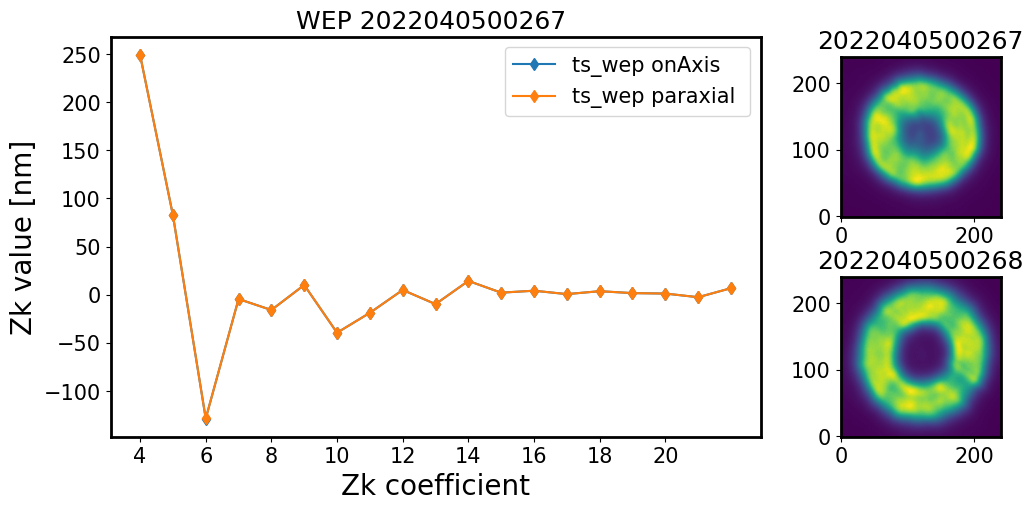

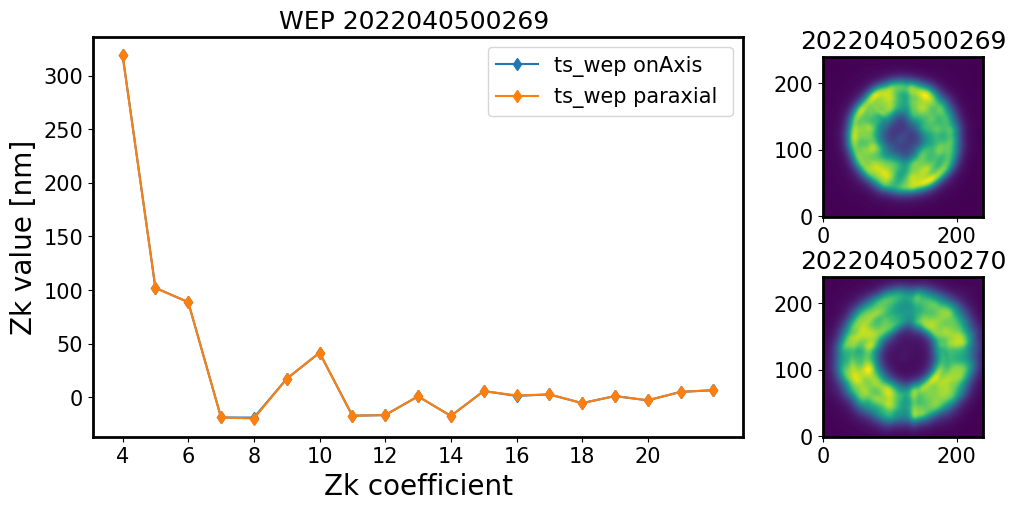

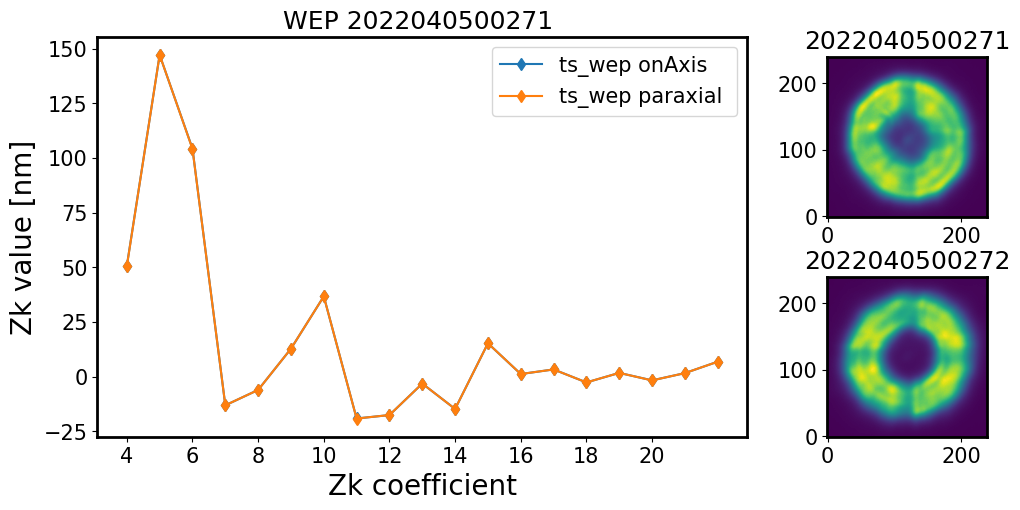

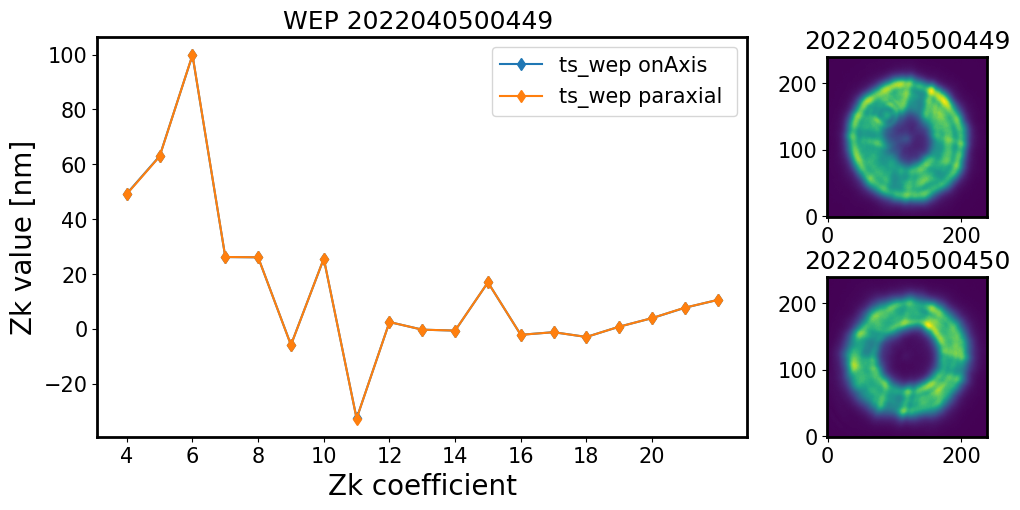

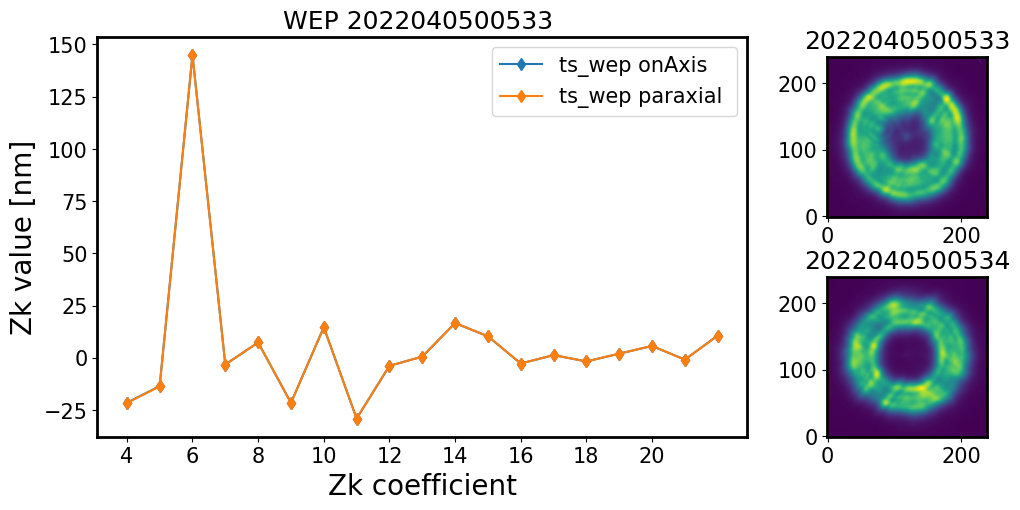

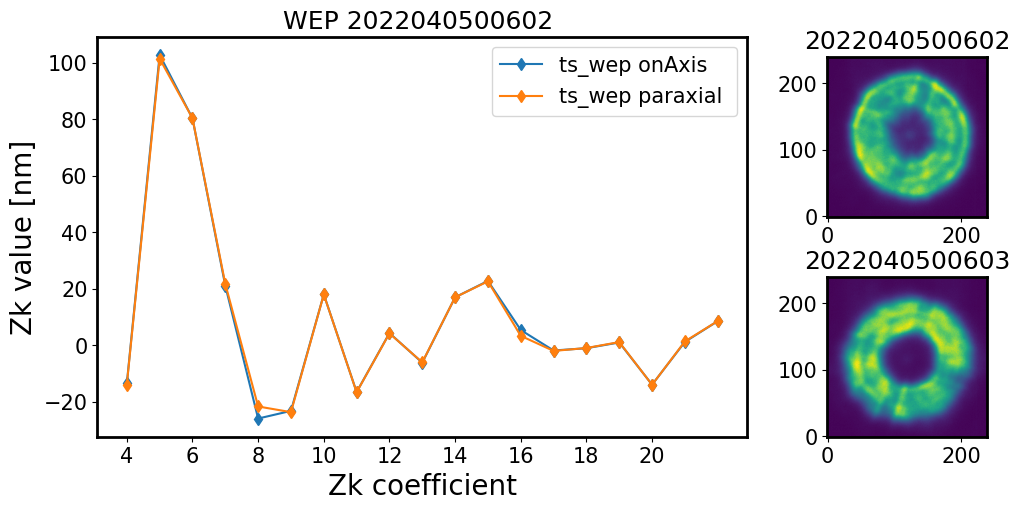

In [145]:
butler = dafButler.Butler('/sdf/data/rubin/repo/main/')

zern_defocus_nm = []
zern_xastig_nm= []
zern_yastig_nm= []
zern_xcoma_nm= []
zern_ycoma_nm= []
zern_xtrefoil_nm= []
zern_ytrefoil_nm= []
zern_spherical_nm= []

for i in range(len(df)):
    
    expIdIntra = intra_expids[i]
    expIdExtra = extra_expids[i]
    print(i, expIdIntra, expIdExtra)
    
    intra_exposure, extra_exposure = read_intra_extra(butler, expIdIntra, 
                                                      expIdExtra,output_coll)
 
    qm_config = QuickFrameMeasurementTask.ConfigClass()
    qm = QuickFrameMeasurementTask(config=qm_config)

    side = 120
    intra_stamp, extra_stamp = make_stamps(qm,intra_exposure,extra_exposure, side)


    # run WEP 
    import analysis_tools as at 

    wepZk = {}
    for model in ['onAxis', 'paraxial']:
        wepZk[model] = at.fit_ts_wep(intra_stamp, extra_stamp, fieldXYIntra=np.zeros(2), 
                                  fieldXYExtra=np.zeros(2), 
                                  sizeInPix = 2*side,
                                  opticalModel=model)

    # store the stamps and wep fit of data
    outDir = 'DM-37676'
    fname = f'auxTel_{expIdIntra}_stamps_wep_zk'
    fpath = os.path.join(outDir,fname)
    print(f'saved {fpath}')
    np.savez(fpath,
        intra=intra_stamp,
        extra=extra_stamp, 
        expIntra=expIdIntra,
        expExtra=expIdExtra,
        #intres=intra_result,
        #extres=extra_result,
        zkfit=wepZk
            )
    # populate the structure  with onAxis results
    zern_defocus_nm.append(wepZk['onAxis'][0])
    zern_xastig_nm.append(wepZk['onAxis'][1])
    zern_yastig_nm.append(wepZk['onAxis'][2])
    zern_xcoma_nm.append(wepZk['onAxis'][3])
    zern_ycoma_nm.append(wepZk['onAxis'][4])
    zern_xtrefoil_nm.append(wepZk['onAxis'][5])
    zern_ytrefoil_nm.append(wepZk['onAxis'][6])
    zern_spherical_nm.append(wepZk['onAxis'][7])


    # Illustrate the results 
    fig = plt.figure(figsize=(10,4))
    # left bottom width height
    ax1 = fig.add_axes([0,0,0.65,1])

    for model in wepZk.keys():
        ax1.plot(np.arange(4,23), wepZk[model], '-d', label=f'ts_wep {model} ')

    ax1.set_xticks(range(4,22)[::2])
    ax1.set_title(f'WEP {expIdIntra} ')#fieldXY=(0,0) ')
    ax1.legend()
    ax1.set_xlabel('Zk coefficient')
    ax1.set_ylabel('Zk value [nm]')

    # bottom right axis
    ax2 = fig.add_axes([0.61, 0, 0.4,0.4])
    ax2.imshow(extra_stamp, origin='lower')
    ax2.set_title(expIdExtra)

    # top right axis 
    ax3 = fig.add_axes([0.61,0.55, 0.4, 0.4])
    ax3.imshow(intra_stamp,origin='lower')
    ax3.set_title(expIdIntra, )



What's going on with `220` ? 

In [42]:
store = np.load('DM-37676/auxTel_2022040500220_stamps_wep_zk.npz', 
               allow_pickle=True)

In [44]:
import analysis_tools as at
import importlib as imp
imp.reload(at)

<module 'analysis_tools' from '/sdf/data/rubin/user/scichris/WORK/AOS/analysis_tools.py'>

Looks like it detected a source too close to the edge... 

In [58]:
result = store['intres'].item()

In [61]:
result

Struct(success=True; brightestObjCentroid=(3829.0, 3415.0); brightestObjCentroidCofM=(3886.119825527839, 3391.8318913108214); brightestObj_xXyY=(17.080864024499274, 13.053515414557868); brightestObjApFlux70=45649553.614564896; brightestObjApFlux25=10263780.379638672; medianXxYy=(0.3576687400160252, 0.6969274200999125))

In [ ]:
store['expIdIntra']
store['expIdExtra']

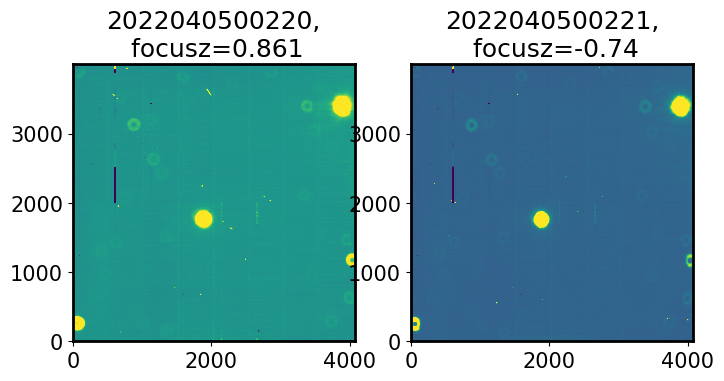

In [47]:
at.preview_auxtel_pair(2022040500220, 2022040500221,datasetRefOrType='postISRCCD',
                      collection=output_coll)

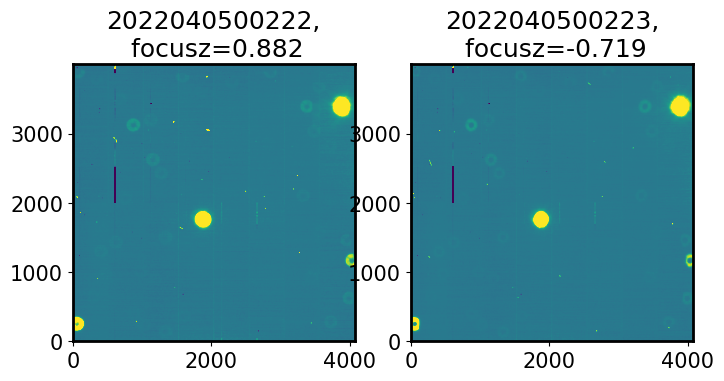

In [125]:
at.preview_auxtel_pair(2022040500222, 2022040500223,datasetRefOrType='postISRCCD',
                      collection=output_coll)

The same problem with `222`, `223` pair... (bright star close to the edge,,,)

What's up with 263-264 - why wouldn't it  give square stamp ? 

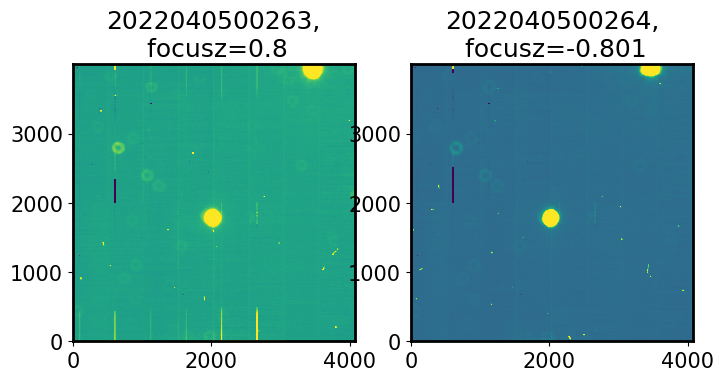

In [138]:
at.preview_auxtel_pair(2022040500263, 2022040500264,datasetRefOrType='postISRCCD',
                      collection=output_coll)

ok, probably it's detecting that bright star towards the edge... clearly must somehow modify qm or pass only a cutout of the image...

In [139]:
intra_exposure, extra_exposure = read_intra_extra(butler, 2022040500263, 
                                                      2022040500264,output_coll)
ycen=1900
xcen=2000
w=1500
result_intra = qm.run(intra_exposure[ycen-w:ycen+w, xcen-w:xcen+w], donutDiameter=2 * side)

INFO:lsst.quickFrameMeasurementTask:Found 14 sources in exposure
INFO:lsst.quickFrameMeasurementTask:Measured 14 of 14 sources in exposure


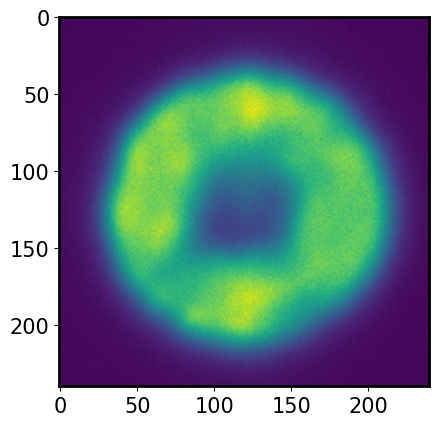

In [143]:
x,y = result_intra.brightestObjCentroidCofM
x = int(x); y=int(y)
plt.imshow(intra_exposure.image.array[y-side:y+side,x-side:x+side ])

What about 269-270 ? 

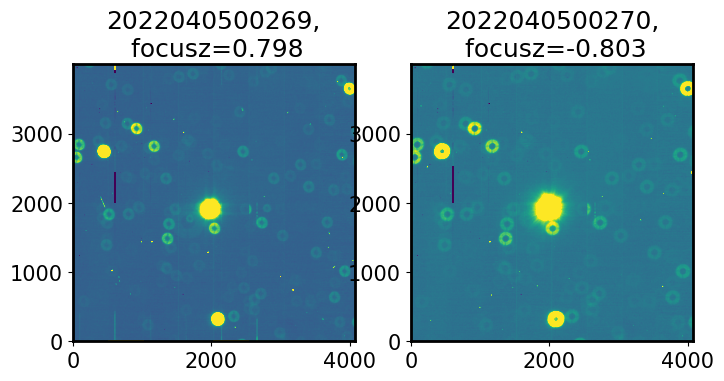

In [136]:
at.preview_auxtel_pair(2022040500269, 2022040500270,datasetRefOrType='postISRCCD',
                      collection=output_coll)

donuts here have really different size - the extra-focal is further away from focus than intra-focal resulting in very different donuts.... 

In [ ]:
Populate with results since for one pair the retrieval entirely fails...

In [146]:
zern_yastig_nm

[91.96897101207911,
 128.02627639548675,
 -134.43341317420666,
 -148.2148341658628,
 -103.66367177045936,
 -128.6570588694727,
 88.7041255859816,
 104.24976038144726,
 99.81457387590171,
 144.99825261547065,
 80.28231156300828]

In [149]:
df['zern_defocus_nm'] = zern_defocus_nm
df['zern_xastig_nm'] = zern_xastig_nm
df['zern_yastig_nm'] = zern_yastig_nm
df['zern_xcoma_nm'] = zern_xcoma_nm
df['zern_ycoma_nm']= zern_ycoma_nm
df['zern_xtrefoil_nm'] = zern_xtrefoil_nm
df['zern_ytrefoil_nm'] = zern_ytrefoil_nm
df['zern_spherical_nm'] = zern_spherical_nm 
# write data to a new CSV file
filename="20220405_match_sens_matrix_metadata_plus_zerns.csv"
df.to_csv(filename) 

## Fit the data to derive sensitivity matrix terms 

In [150]:
from scipy.optimize import curve_fit
def parabola(x,b, x0, a):
    return b + a*(x-x0)**2 
def line(x,b, m):
    return b + m*x 
def invparabola(y,b,x0,a):
    return x0+np.sqrt((y-b)/a)
def invline(y,b,m):
    return (y-b)/m

## Plot y-coma as a function of Y-hexapod decentering (C_Y term)

Wavefront Y-Coma as a function of Y-Hexapod displacement fit intercept and slope  [-236.27824468  104.46979685]


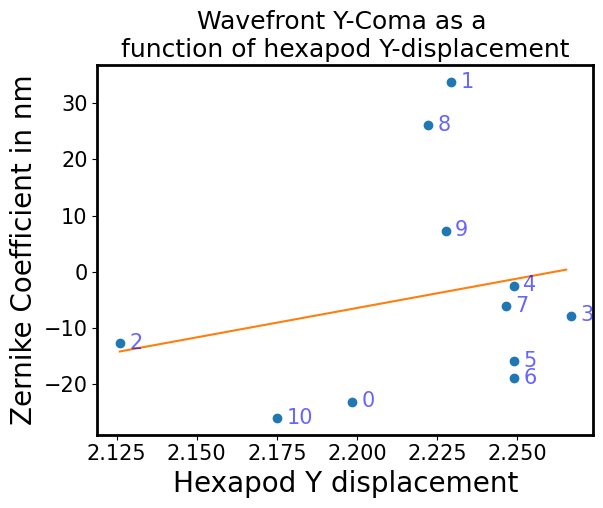

In [178]:
inds = np.arange(0,11) 
# cherry-pick the values desired, should certain not be used
#inds = [0,1,2,3,5,7,8,9,10]

xdata=df['y'][inds]
ydata=df['zern_ycoma_nm'][inds]

plt.plot(xdata,ydata,'o')
for i in range(len(inds)):
    plt.text(xdata.iloc[i]+0.003,ydata.iloc[i]-1,inds[i],c='b',alpha=0.6)
    
x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
popt,pcov = curve_fit(line, xdata, ydata)
print('Wavefront Y-Coma as a function of Y-Hexapod displacement fit intercept and slope ',popt)

plt.plot(x,line(x, *popt))

# plt.xlabel('Hexapod displacement in the plane')
plt.ylabel('Zernike Coefficient in nm')
plt.xlabel('Hexapod Y displacement')
plt.title('Wavefront Y-Coma as a \nfunction of hexapod Y-displacement')
plt.show()

## Plot Defocus as a function of Y-hexapod decentering  C_YZ

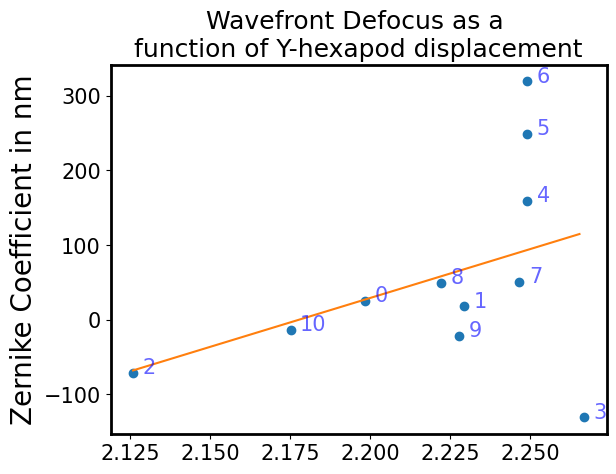

In [179]:
xdata=df['y'][inds]
ydata=df['zern_defocus_nm'][inds]

plt.plot(xdata,ydata,'o')
for i in range(len(inds)):
    plt.text(xdata.iloc[i]+0.003,ydata.iloc[i]-1,inds[i],c='b',alpha=0.6)
x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
popt,pcov = curve_fit(line, xdata, ydata)

plt.plot(x,line(x, *popt))
# plt.xlabel('Hexapod displacement in the plane')
plt.ylabel('Zernike Coefficient in nm')
plt.title('Wavefront Defocus as a \nfunction of Y-hexapod displacement')
plt.show()

#print('Wavefront X-Coma as a function of Hexapod displacement intercept and slope',popt)

## Plot X-Coma as a function of Y-hexapod decentering

Wavefront X-Coma as a function of Y-Hexapod displacement fit intercept and slope  [ 588.13657358 -264.34493053]


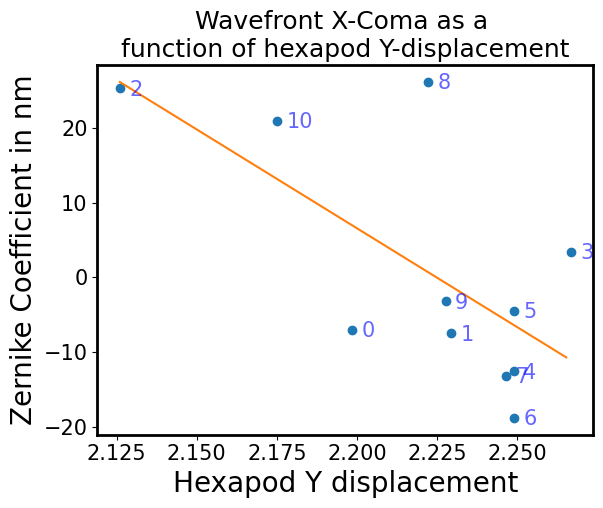

In [183]:

xdata=df['y'][inds]
ydata=df['zern_xcoma_nm'][inds]

plt.plot(xdata,ydata,'o')
for i in range(len(inds)):
    plt.text(xdata.iloc[i]+0.003,ydata.iloc[i]-1,inds[i],c='b',alpha=0.6)
x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
popt,pcov = curve_fit(line, xdata, ydata)
print('Wavefront X-Coma as a function of Y-Hexapod displacement fit intercept and slope ',popt)

plt.plot(x,line(x, *popt))
# plt.xlabel('Hexapod displacement in the plane')
plt.ylabel('Zernike Coefficient in nm')
plt.xlabel('Hexapod Y displacement')
plt.title('Wavefront X-Coma as a \nfunction of hexapod Y-displacement')
plt.show()

These are not very similar to the example in https://tstn-016.lsst.io/#eqn-matrix.  One reason  is that I have not used a day that was particularly intended for deriving the senM. 
So this is an example of running that analysis on a random obs day.  
    
Probably curating for a different day would yield better result.
    
    But: 
        
        * what about C_XY, C_XZ, C_ZY - do we use those too?  